# Modelo de árbol de decisión

Árbol elemental con libreria rpart, es un ejemplo sencillo para introducirnos a la librería y al modelo.

### 1er Paso

Debe tener instaladas las librerias  data.table  ,  rpart   y rpart.plot

In [144]:
library("rpart.plot")

In [145]:
#cargo las librerias que necesito
require("data.table")
require("rpart")
require("rpart.plot")

In [3]:
# Aquí se debe poner la carpeta de SU computadora local

# setwd("D:\\gdrive\\ITBA2022A\\")  #Establezco el Working Directory

# C:\Users\tomya\Desktop\Mineria de Datos
setwd("C:\\Users\\tomya\\Desktop\\Mineria de Datos")

### 2do Paso

Cargo los datos de 202009 que es donde voy a ENTRENAR el modelo

In [4]:
dtrain  <- fread("./datasets/paquete_premium_202011.csv")

### 3er paso

Genero el modelo,  aquí se construye el árbol.

Defino los hiperparámetros (más que definir los instancio).

In [43]:
# excelente, me dio el mejor resultado

modelo  <- rpart("clase_ternaria ~ .",
                 data = dtrain,
                 xval=0,
                 cp=        -0.09,  #esto significa no limitar la complejidad de los splits
                 minsplit=  2000,   #minima cantidad de registros para que se haga el split
                 minbucket=   333,   #tamaño minimo de una hoja
                 maxdepth=   6 )  #PRUEBO  una profundidad de 10

In [134]:
# muy bueno, un poco menos que con 6 en depth

modelo  <- rpart("clase_ternaria ~ .",
                 data = dtrain,
                 xval=0,
                 cp=        -0.0333,  #esto significa no limitar la complejidad de los splits
                 minsplit=  1950,   #minima cantidad de registros para que se haga el split
                 minbucket=   333,   #tamaño minimo de una hoja
                 maxdepth=   6.05 )  #PRUEBO  una profundidad de 10

In [147]:
# mjuy malo

modelo  <- rpart("clase_ternaria ~ .",
                 data = dtrain,
                 xval=0,
                 cp=        -1,  #esto significa no limitar la complejidad de los splits
                 minsplit=  1850,   #minima cantidad de registros para que se haga el split
                 minbucket=   333,   #tamaño minimo de una hoja
                 maxdepth=   6 )  #PRUEBO  una profundidad de 10

### 4to paso

Ahora grafico el árbol, va a ser muy frondoso porque la profundidad es de 10

Warning message:
"labs do not fit even at cex 0.15, there may be some overplotting"

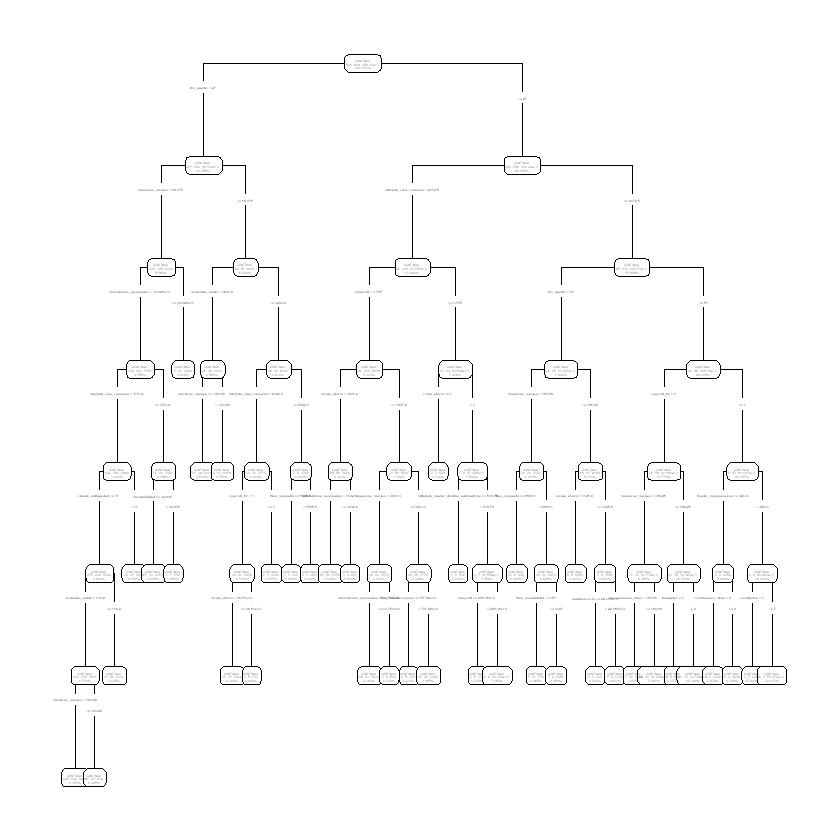

In [146]:
prp(modelo, extra=101, digits=5, branch=1, type=4, varlen=0, faclen=0)

# Ahora aplico al modelo  a los datos de 202101  y genero la salida para kaggle

### 5to paso

Cargo los datos de 202011, que es donde voy a APLICAR el modelo

In [148]:
dapply  <- fread("./datasets/paquete_premium_202101.csv")

### 6to paso

Aplico el modelo a los datos nuevos. 

Predicción es una matriz con TRES columnas, llamadas:

+ "BAJA+1" 
+ "BAJA+2"
+ "CONTINUA"

Donde cada columna es el vector de probabilidades.

In [149]:
prediccion  <- predict( modelo, dapply , type = "prob") #aplico el modelo

### 7mo paso

Agrego a dapply una columna nueva que es la probabilidad de BAJA+2

In [150]:
dapply[ , prob_baja2 := prediccion[, "BAJA+2"] ]

Sólo le envío estímulo a los registros con probabilidad de BAJA+2 mayor a 1/60. A continuación planteo esta situación algebraicamente.

In [151]:
dapply[ , Predicted  := as.numeric(prob_baja2 > 1/60) ]

### 8vo Paso 

Genero un dataset con las dos columnas que me interesan

In [152]:
entrega  <- dapply[   , list(numero_de_cliente, Predicted) ] #genero la salida

### 9no Paso 

Finalmente genero el archivo para Kaggle

+ Creo el directorio dentro de labo para alojar los resultados de mi predicción, si el directorio ya esxiste devuelve error.

### 10mo Paso

Grabo el dataset en un archivo .csv para msubir a kaggle.

In [153]:
fwrite( entrega, 
        file= "./labo/exp/KA2002/K102_001.csv", 
        sep= "," )